#### Rex Gayas
#### Week 2 Exercise 2.2 Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### EDA for Predictive Analytics 

#### Task 1 EDA for Primary Dataset

##### Loading and Preliminary Review of Dataset

In [23]:
import pandas as pd

# Load the Dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 2\\eda_data.csv"
df = pd.read_csv(file_path)

# Initial Inspection
print("First 5 rows of the dataset:")
print(df.head())  # Display the first 5 rows to better understand the data

# Obtain a summary of the DataFrame
print("\nDataset information:")
print(df.info())  


First 5 rows of the dataset:
          x0         x1         x2        x3         x4         x5  \
0 -17.933519   6.559220 -14.452810 -4.732855   0.381673   2.563194   
1 -37.214754  10.774930 -15.384004 -0.077339  10.983774 -15.210206   
2   0.330441 -19.609972  -9.167911  2.064124  12.071688  12.506141   
3 -13.709765  -8.011390   6.759264  1.727615  -1.768382  24.039733   
4  -4.202598   7.076210 -26.004919 -4.269696  -3.414224   2.115989   

            x6          x7         x8         x9     x10       x11        x12  \
0  ($1,306.52)  -89.394348 -28.454044 -16.201298  -0.01%  0.217010   9.729891   
1     ($24.86)  153.032652 -32.557736  69.675903   0.00% -3.584908  35.727926   
2    ($110.85) -141.437276 -20.794952  55.042604   0.00% -3.991366  -9.283523   
3    ($324.43)   51.039653  -7.046908 -31.424419   0.01%  7.908897  -2.891882   
4   $1,213.37   -31.046700  19.061182 -31.525515  -0.01%  0.846719  25.497480   

        x13         y  
0 -0.786431  0.666146  
1 -0.985552  0.

##### Descriptive Statistics and Initial Data Cleaning

In [24]:
# Calculate descriptive statistics for numerical columns
print(df.describe())

# Initial data cleaning: converting object-type columns to numeric where possible
# Inspect the unique values of the object-type columns to understand the non-numeric characters contained within
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())

# Define a function to clean the strings and convert them to floats
def clean_numeric(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace(',', '').replace('%', ''), errors='coerce')
    return x

# Apply the function to the object columns
for column in object_columns:
    df[column] = df[column].apply(clean_numeric)

# Check the new data types after cleaning
print(df.dtypes)


                x0           x1           x2           x3           x4  \
count  9996.000000  9995.000000  9996.000000  9997.000000  9997.000000   
mean      6.501091    -3.729880    -7.335819    -0.001323     1.347141   
std      29.140034    17.237178    38.355015     3.995307     9.606695   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.094564   -15.356197   -33.079854    -2.681308    -5.047927   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.214107     7.764036    18.477979     2.635699     7.807128   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

                x5           x7           x8           x9          x11  \
count  9999.000000  9998.000000  9999.000000  9996.000000  9995.000000   
mean      1.214413    -4.239862    -0.297257   -22.482050     0.034517   
std      17.352962   131.921984    37.987287    91.723733     6.065264   
min     -59.900503  -661.764937  -142

Certain columns were read as object type due to the presence of commas and percentage signs. Cleaning function was implemented to remove non-numeric characters and convert the strings to floats.

##### Handling Missing Data and Further Cleaning

In [25]:
# Clean 'object' type columns and convert to numeric
def clean_and_convert(column):
    if column.dtype == 'object':
        # Replace non-numeric characters like '$' and ',' then convert to float
        column = column.str.replace('[\$\,]', '').astype(float)
    return column

df['x6'] = clean_and_convert(df['x6'])
df['x10'] = clean_and_convert(df['x10'])

# Impute or remove missing values
# Fill missing values with the median, which is best for outliers
for col in df.columns:
    if df[col].isnull().any():
        median = df[col].median()
        df[col].fillna(median, inplace=True)

# Print unique values in 'x6' and 'x10' to verify that they have been cleaned
print("Unique values in 'x6' after cleaning:", df['x6'].unique())
print("Unique values in 'x10' after cleaning:", df['x10'].unique())

Unique values in 'x6' after cleaning: [nan]
Unique values in 'x10' after cleaning: [-0.01  0.    0.01  0.02 -0.02 -0.03  0.03 -0.04  0.04]


C:\Users\RexAr\AppData\Local\Temp\ipykernel_19256\30676029.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
C:\Users\RexAr\AppData\Local\Temp\ipykernel_19256\30676029.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

NaN values were noted after cleaning, which suggests that during the conversion of object types to float, some values could not be interpreted as numbers and were converted to NaN. This is possible due to the result of empty strings or non-numeric characters that couldn't be handled by pd.to_numeric() with the errors='coerce' parameter.

##### Data Visualization

                x0           x1           x2           x3           x4  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      6.501138    -3.729918    -7.335830    -0.001321     1.347115   
std      29.135661    17.233729    38.349260     3.994907     9.605734   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.091886   -15.351276   -33.072206    -2.681270    -5.047231   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.196314     7.761736    18.464243     2.635557     7.802829   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

                x5   x6           x7           x8           x9          x10  \
count  9999.000000  0.0  9999.000000  9999.000000  9999.000000  9999.000000   
mean      1.214413  NaN    -4.239913    -0.297257   -22.481443    -0.000041   
std      17.352962  NaN   131.915386    37.987287    91.709978     0.010414   
min     -59.90050

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


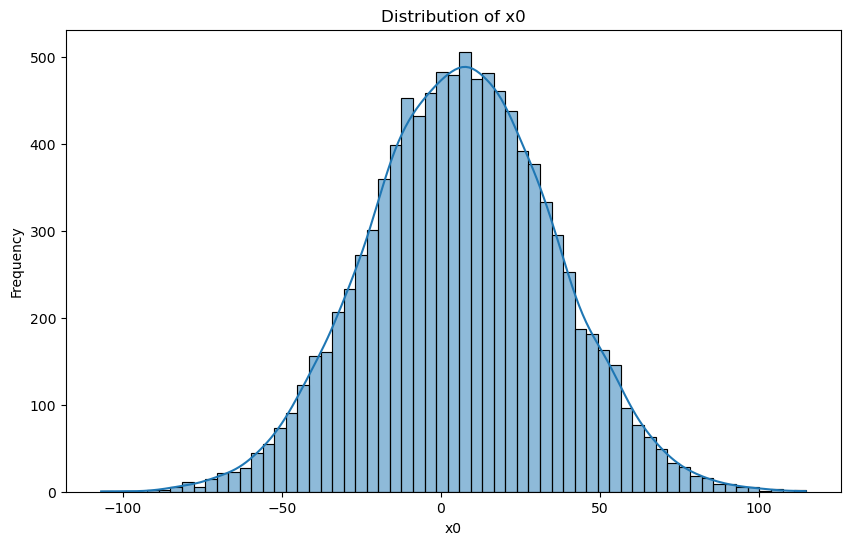

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


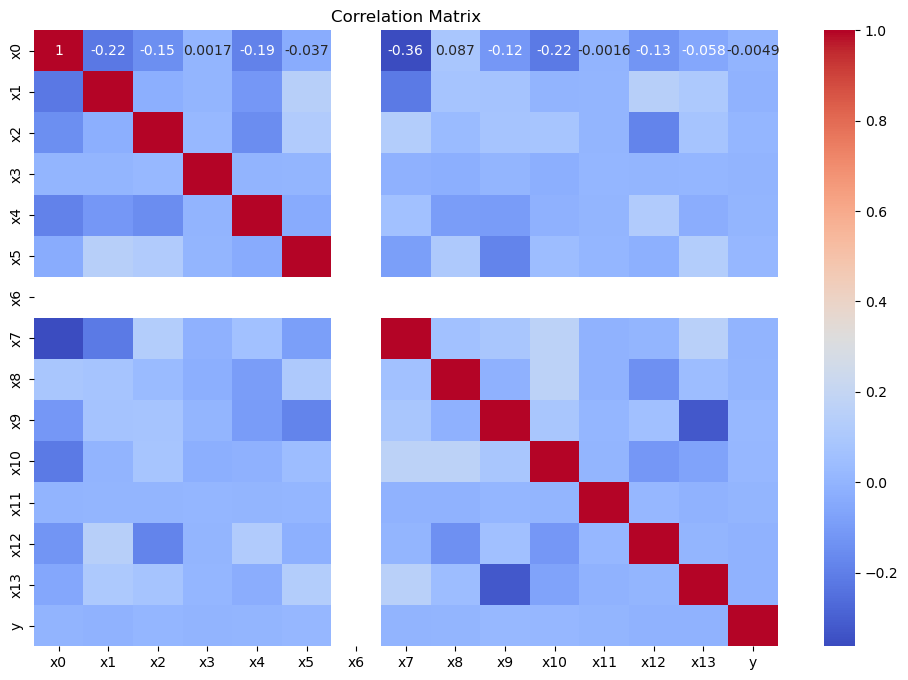

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())


# Distribution of a single column 
plt.figure(figsize=(10, 6))
sns.histplot(df['x0'], kde=True)
plt.title('Distribution of x0')
plt.xlabel('x0')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The summary statistics show that the data varies across different columns, with some columns having a standard deviation of zero, indicating no variance. This is indicative of columns containing a single value (x10) or NaN values (x6) that have been imputed with the median.

Subsequently, the correlation matrix heatmap represents the correlation coefficients between pairs of variables. It's apparent that some variables have a degree of correlation with each other, while others do not. 

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


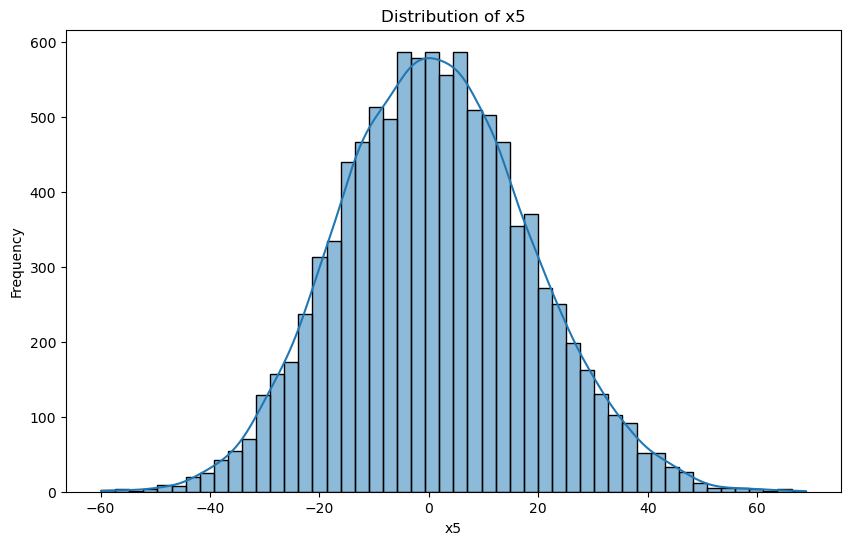

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


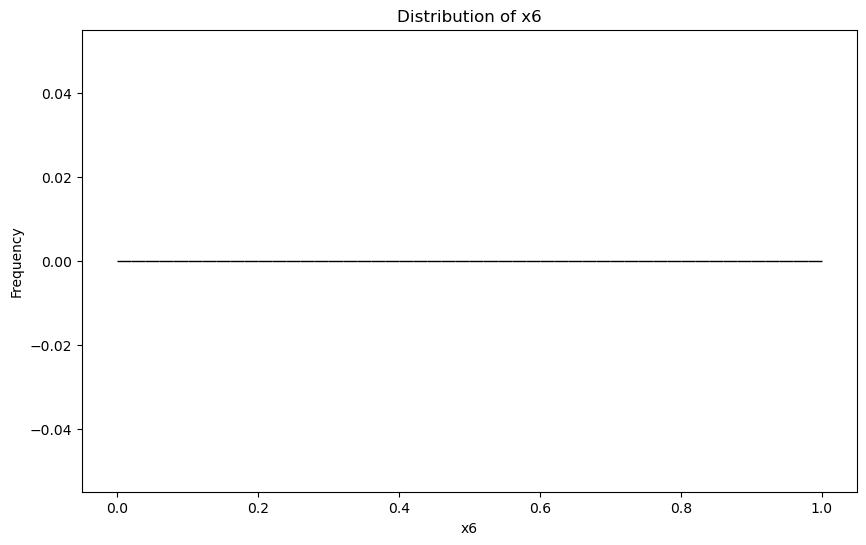

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


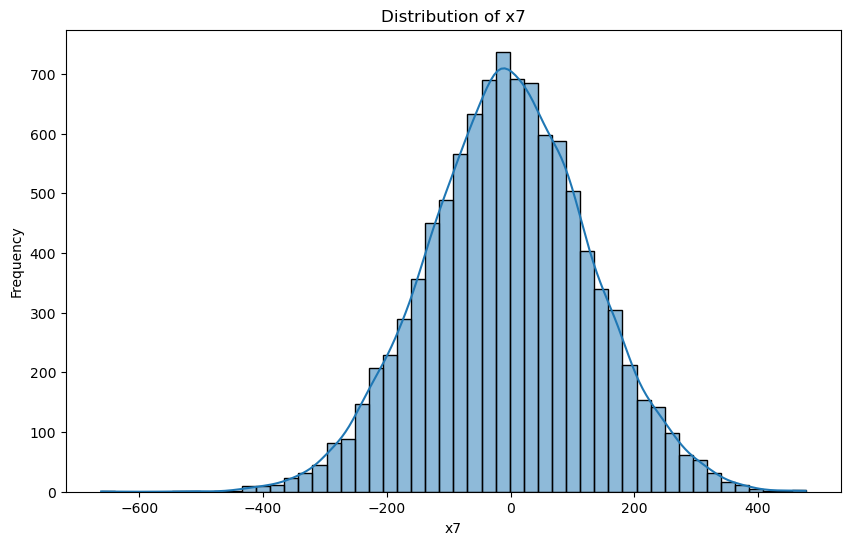

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


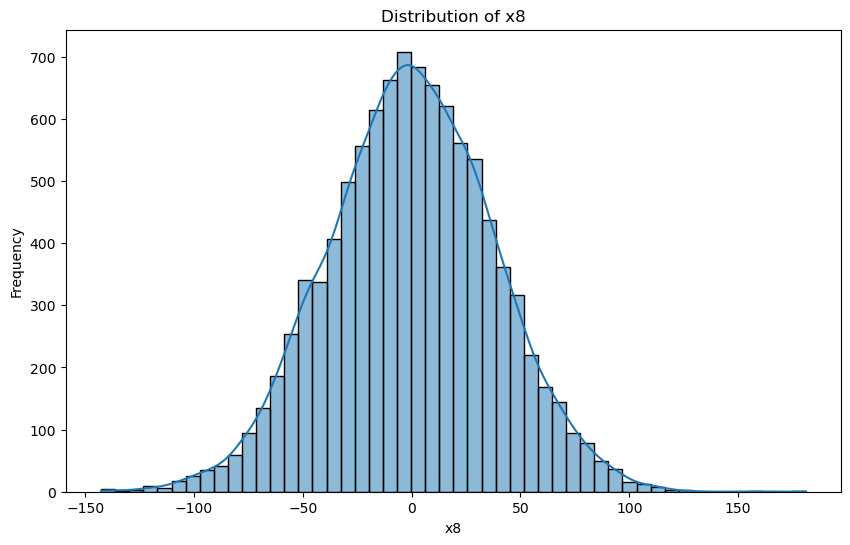

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


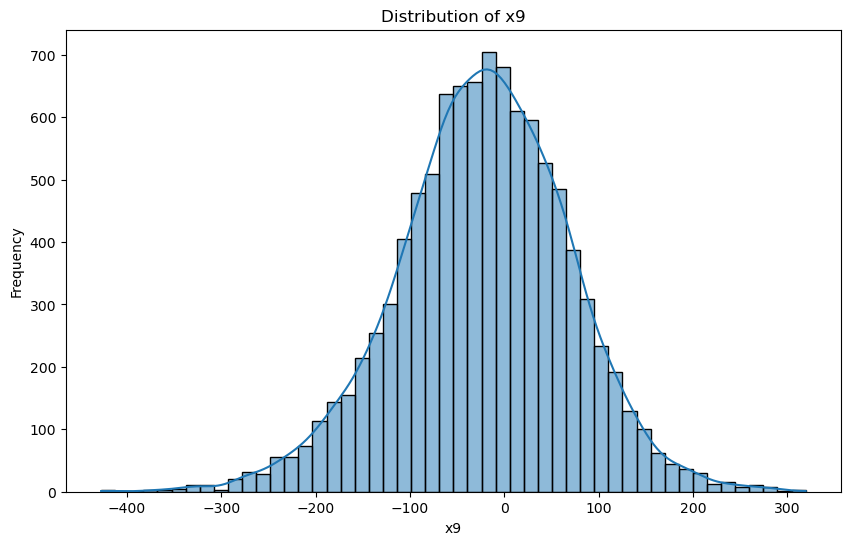

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


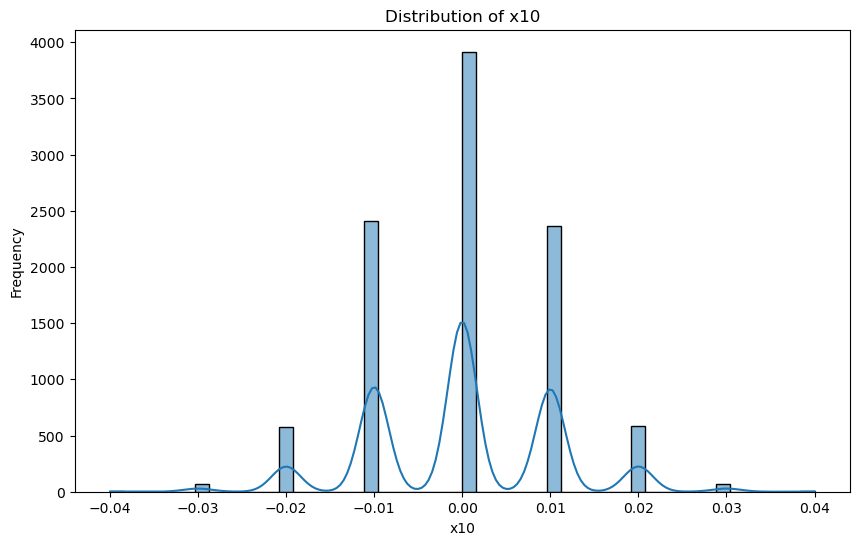

In [30]:
# Histograms for a selection of columns
selected_columns = ['x5', 'x6', 'x7', 'x8', 'x9', 'x10']

# Plotting histograms with 50 bins for each selected column
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Additional histograms were created to help visualize the zero variance in x6 and x10. 

In [17]:
# Drop the non-variant columns from the DataFrame
df = df.drop(['x6', 'x10'], axis=1)

# Confirm the columns have been dropped
print(df.columns)


Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x11', 'x12',
       'x13', 'y'],
      dtype='object')


Because x6 and x10 did not vary, these were dropped as they will most likely  not provide any useful information for predictive modeling, and presumptively cannot contribute to the model's ability to differentiate between observations.

#### Task 2 Data Profiling for Smaller Dataset

In [31]:
import pandas as pd
import ydata_profiling as pp

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 2\\eda_data_small.csv"
df = pd.read_csv(file_path)

# Generate the profile report
profile = pp.ProfileReport(df, title="Profiling Report", correlations={
    "auto": {"calculate": False}
})

# Save the report to an HTML file
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Previously, I did not receive the "error displaying widget message" as it actually showed the loading bars.
However, this might be due to JavaScript issues or conflicts that prevent the widget from rendering correctly.

It should be noted that pandas_profiling is not compatible with my current Python environment. As suggested by Teams, the ydata_profiling was utilized and subsequent HTML file was generated. 

#### References

Frei, L. (2019, April 25). Speed up your exploratory data analysis with pandas-profiling. Towards Data Science. Retrieved from https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625

Shin, T. (2020, January 12). An extensive step by step guide to exploratory data analysis. Towards Data Science. Retrieved from https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e